# Régression par KNN

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
mpl.rcParams['figure.figsize'] = (4, 3)

In [4]:
! pip install scikit-learn

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## prédiction d'un sinus

**création du sinus  bruité**

on crée un sinus avec $N$ points entre $0$ et $2\pi$ 

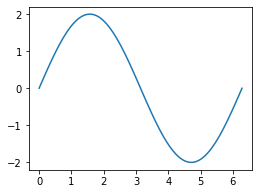

In [6]:
N = 100
X = np.linspace(0, 2*np.pi, N)
a = 2
y = a*np.sin(X) # on augmente l'amplitude de notre sinus¨
plt.plot(X, y);

on bruite notre sinus en modifiant un point sur $p$ avec une valeur aléatoirement générée d'une distribution uniforme entre $[0, 1[$  
(entre 0 et 1, donc le milieu est 0.5)

In [7]:
p = 5
middle = 0.5
noise = middle - np.random.rand(N//p)
# on veut des valeurs négatives aussi !

In [8]:
y[0:len(y):5].shape, noise.shape

((20,), (20,))

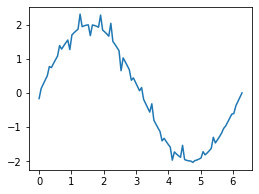

In [9]:
y[::p] = y[::p] + noise # remarquez le slicing
plt.plot(X, y);

on fait une dataframe

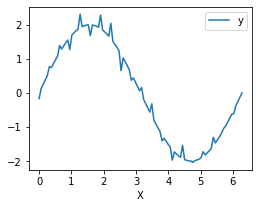

In [10]:
df_sinus = pd.DataFrame()
df_sinus['X'] = X
df_sinus['y'] = y
df_sinus.plot(x='X', y='y');
# df_sinus.plot()

**plages de valeurs**

pas besoin de faire de mise à l'échelle dans notre exemple, on n'a qu'une seule colonne...  

In [11]:
df_sinus['X'].min(), df_sinus['X'].max()

(0.0, 6.283185307179586)

In [12]:
df_sinus.describe()

,X,y
count,100.000000,100.000000
mean,3.141593,0.008587
std,1.841258,1.419039
min,0.000000,-2.039650
25%,1.570796,-1.386863
50%,3.141593,0.031728
75%,4.712389,1.382831
max,6.283185,2.312001


### entraînement d'un prédicteur par KNN-régression

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

`KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)`

In [14]:
# help(KNeighborsRegressor)

les paramètres de la méthode (ceux qui nous intéressent aujourd'hui)


- `n_neighbors` le $k$ (qui ici peut varier de $1$ à $100$)


- `weights` la pondération  
par défaut `'uniform'`  
peut-être `'distance'` (inverse de la distance)  
une une fonction à vous


- `algorithm` l'algorithme utilisé pour le calcul des $k$ plus proches voisins  
par défaut `'auto'` qui essaie de prendre le meilleur  
`'ball_tree'`, `'kd_tree'`, `'brute'` (brute-force search)

- `metric` la fonction de calcul de distance  
par défaut `'minkowski'` auquel on peut indiquer `p` (standard Euclidean distance quand p vaut 2)


- et d'autres paramètres, comme `p`, qui dépendent de nos autres choix de paramètres

In [15]:
n_neighbors = 8

# on construit un prédicteur de régression par KNN avec k = n_neighbors
knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)

# un autre pour tester
knn_sinus = KNeighborsRegressor(n_neighbors=n_neighbors)

In [16]:
# on sépare entrées et sorties pour l'entraînement
X = df_sinus[['X']].to_numpy()
y = df_sinus['y'].to_numpy()

X.shape, y.shape

((100, 1), (100,))

In [17]:
# on entraîne le modèle sur un tableau numpy
knn_sinus.fit(X, y);

In [18]:
# on entraîne le modèle sur un tableau pandas
knn_model.fit(df_sinus[['X']], df_sinus['y']);

### prédiction des données d'entraînement

le modèle a été entraîné, on peut prédire des valeurs  
par exemple celles du jeu d'entraînement

In [19]:
# on prédit les données d'entraînement avec le prédicteur
y_fit = knn_model.predict(df_sinus[['X']])

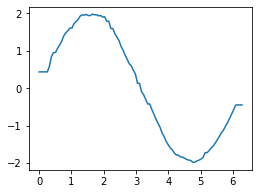

In [20]:
# on plot les données générées
plt.plot(df_sinus['X'], y_fit)

on obtient un sinus moins bruité

pourquoi y-a-t-il les zones horizontales en début et en fin de prédiction ?  
à cause de la non existence des plus proches voisins

### qualité du prédicteur - métriques

on calcule les erreurs

calculons la RMSE (root-mean-square-error) et la MSE (mean-square-error)

In [21]:
np.sqrt(np.sum(np.power(y_fit - df_sinus['y'], 2))/len(df_sinus))

0.15874782932959774

en fait on a des tas de métriques prédéfinies dans `metrics`  
utilisons `metrics.mean_squared_error`  
`squared` is True it is MSE value, RMSE if False

In [22]:
metrics.mean_squared_error(y_fit, df_sinus['y'], squared=False)

0.15874782932959774

In [23]:
np.sum(np.power(y_fit - df_sinus['y'], 2))/len(df_sinus)

0.025200873316859093

In [24]:
metrics.mean_squared_error(y_fit, df_sinus['y'], squared=True)

0.025200873316859093

### prédiction de données de tests

### sur tableau `numpy`

on génère de nouveaux points linéairement espacés entre $0$ et $2 \pi$

In [25]:
n = 500
pts = np.linspace(0, 2*np.pi, n)
pts.shape

(500,)

lors de l'entraînement, la forme de tableau était une matrice $(100, 1)$ i.e. $100$ lignes et $1$ colonne  
les prédictions se feront donc sur des tableaux de cette forme $(n, 1)$

In [26]:
df_sinus[['X']].shape, X.shape
# le premier est un tableau pandas le second un tableau numpy

((100, 1), (100, 1))

la forme du tableau généré n'est pas la bonne: on doit la modifier pour obtenuir les prédictions

In [27]:
pts.shape

(500,)

on lui donne la forme d'une matrice de $n$ observstions et $1$ colonne

In [28]:
pts = pts.reshape(-1, 1)
pts.shape

(500, 1)

In [29]:
type(pts)

numpy.ndarray

In [30]:
y_pred = knn_sinus.predict(pts)

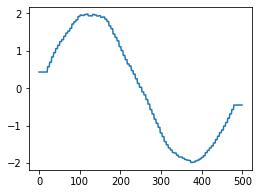

In [31]:
plt.plot(y_pred);

### sur tableau `pandas`

on génère de nouveaux points linéairement espacés entre $0$ et $2 \pi$

In [32]:
n = 100
df_pred = pd.DataFrame(np.linspace(0, 2*np.pi, n),
                      columns=['X'])
df_pred.head()

,X
0,0.000000
1,0.063467
2,0.126933
3,0.190400
4,0.253866


In [33]:
df_pred['y'] = knn_model.predict(df_pred[['X']])

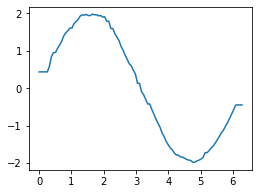

In [34]:
plt.plot(df_pred['X'], df_pred['y']);

pourquoi y-a-t-il les zones horizontales en début et en fin de prédiction ?  
à cause de la non existence des plus proches voisins

qualité du sinus ?  
qualité de la prédiction ?  
les données pour la prédiction ont-elles la même distibution que les données d'entraînement ? heu non

In [35]:
metrics.mean_squared_error(np.sin(df_pred['X']), df_pred['y'], squared=False)

0.6981135440022824

## mise à l'échelle des caractéristiques

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

on fait une dataframe avec 2 colonnes dont les plages de valeurs sont très différentes

,X1,X2
0,8.054207,726.578030
1,9.244811,725.387383
2,8.598188,724.897098
3,5.713117,723.650864
4,5.231424,720.845011


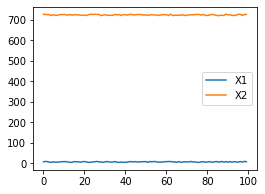

In [37]:
df = pd.DataFrame()
m1, s1 = 1, 4.8
m2, s2 = 100, 7.2
df['X1'] = (np.random.rand(100)+m1)*s1
df['X2'] = (np.random.rand(100)+m2)*s2
df.plot();
df.head()

on met à l'échelle par normalisation

In [38]:
tab = StandardScaler().fit(df).transform(df)

<AxesSubplot:>

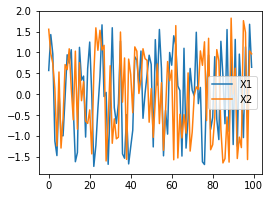

In [39]:
df_std_scaled = pd.DataFrame(tab, columns=df.columns)
df_std_scaled.plot()

on met à l'échelle par min-max

<AxesSubplot:>

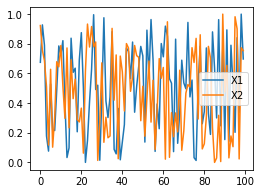

In [40]:
tab = MinMaxScaler().fit(df).transform(df)

df_min_max_scaled = pd.DataFrame(tab, columns=df.columns)
df_min_max_scaled.plot()

## jeu d'entraînement et jeu de test (validation)

découpons les observations dont nous disposons en
- un jeu de d'entraînement
- un  jeu de test

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
df_iris = pd.read_csv('./iris.csv')
df_iris.head()

FileNotFoundError: [Errno 2] No such file or directory: './iris.csv'

In [48]:
X = df_iris.iloc[:, :-1]
y = df_iris['Species']

NameError: name 'df_iris' is not defined

### à-la-main

peut être faux  
préférez les fonctions `sklearn`

In [42]:
t = 0.20
nb = len(X) - int(len(X)*t)
X_train, X_test = X[:nb], X[nb:]
y_train, y_test = y[:nb], y[nb:]

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 1), (20, 1), (80,), (20,))

Que pensez-vous de ce split ?

In [44]:
y_train.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [45]:
y_test.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

les données du `csv` sont ordonnées

### avec `train_test_split`

la méthode `train_test_split` prend des paramètres:  
`test_size` et `train_size`  
`random_state` (reproduction de shuffling)  
`shuffle`

In [ ]:
X_train, X_test, y_train, y_test = \
   train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
train_test_split?

## grid-search

nous voulons déterminer les meilleurs paramètres  
par exemple, dans le knn, on voudrait tester différentes cominaisons de  
`k`, de distance, de pondérations, d'algorithme...

### à-la-main pour `k`

In [ ]:
errors = []
for k in range(1, 100):
    knn_model = KNeighborsRegressor(k)
    knn_model.fit(df_sinus[['X']], df_sinus['y'])
    y_fit = knn_model.predict(df_sinus[['X']])
    errors.append(metrics.mean_squared_error(y_fit,
                                             df_sinus['y'], squared=True))

on a gardé les erreurs, on peut les plotter

In [ ]:
plt.plot(errors)
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('K Neighbors Regressor');

comme il va falloir conserver les combinaisons et leur qualité  
autant utiliser des méthodes pré-définies comme le `GridSearchCV`

### avec `GridSearchCV`

In [ ]:
from sklearn.model_selection import GridSearchCV

pour déterminer empiriquement des méta-parameters, on utilise le grid-search  
c'est une manière automatique de lancer l'apprentissage sur des combinaisons de valeurs des paramètres   
afin de déterminer la meilleure combinaison

on donne un dictionnaire
- avec comme clé les paramètres dont on veut tester les valeurs
- comme valeurs les valeurs choisiesà et les valeurs à utilise

créons un classifier  
affichons ses paramètres et leurs valeurs dans ce classifier

In [ ]:
knn = KNeighborsClassifier()
knn.get_params()

In [ ]:
parameters = {'n_neighbors': [5, 10],
              'weights': ['uniform', 'distance'],
              'algorithm': ['kd_tree',  'brute'],
              'p': [1, 2],
             }

on définit un objet de grid-search avec
- le classifier à entraîner
- le dictionnaire des paramètres à essayer


et des paramètres comme  
`scoring` qui indique la stratégie d'évaluation de la performance du modèle  
(par défaut celle du classifier par exemple pour `KNeighborsClassifier.score`  
c'est la *mean accuracy*  *nb correct predictions divided by total number of predictions*)

`cv` par exemple un `5`  
le jeu de données va être divisé en 5 ensembles   
1 servira au test et les 4 autres à l'apprentissage  
(il le fera donc 5 fois)


pour utiliser `GridSearchCV`
- la méthode `fit` lance tous les apprentissage
- à la fin des apprentissages,  
l'attribut `best_params_` contient le dictionnaire de la combinaison de paramètres choisie  
l'attribut `cv_results_` indique des tas d'informations (à présenter en dataframe) 




In [ ]:
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters,
                   cv=5,
                   verbose=3,
                   return_train_score=True)
clf.fit(X,y);

In [ ]:
clf.best_params_

In [ ]:
pd.DataFrame(clf.cv_results_).head()

In [ ]:
df_results = pd.DataFrame(clf.cv_results_)
df_results.head(2)

In [ ]:
df_results.describe()

In [ ]:
df_results[[c for c in df_results.columns if 'score' in c if 'split' in c if 'test' in c]].plot(figsize=(20, 10))

In [ ]:
df_results[[c for c in df_results.columns if 'score' in c if 'split' in c]].plot(figsize=(20, 10))

In [ ]:
clf.score(X, y)

## pipeline

quand les codes commencent à se complexifier    
utiliser `Pipeline`

In [ ]:
from sklearn.pipeline import Pipeline

nous voulons faire:
une normalisation puis entraîner un prédicteur  
et ceci dans un grid-search

In [ ]:
pipe = Pipeline([
        ('sc', StandardScaler()),     
        ('knn', KNeighborsClassifier()) 
    ])

# les noms des paramètres sont
#   préfixés par le nom de l'objet auquel ils se rapportent puis __
#   e.g.  knn__p
params = {
    'sc__with_mean' : [True, False],
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__p' : [1, 2],
    'knn__algorithm': ['kd_tree',  'brute'],
    
}  # 2 * 5 * 2 * 2 combinaisons

clf_pipe = GridSearchCV(estimator=pipe,           
                   param_grid=params, 
                   cv=5,
                   return_train_score=True, # Turn on cv train scores
                   verbose=1)
clf_pipe.fit(X, y)
clf_pipe.best_params_

In [ ]:
clf_pipe.score(X, y)

erreur sur les classes

In [ ]:
y_pred = clf_pipe.predict(X)

In [ ]:
np.mean(y_pred == y)

In [ ]:
1 - np.mean(y_pred != y)

## boxplot et histograms

In [ ]:
df_results = pd.DataFrame(clf_pipe.cv_results_)
df_results.head(2)

In [ ]:
df_results.describe()

In [ ]:
df_results[[c for c in df_results.columns if 'score' in c if 'split' in c if 'test' in c]].plot(figsize=(20, 10))

In [ ]:
df_results[[c for c in df_results.columns if 'score' in c if 'split' in c]].plot(figsize=(20, 10))

In [1]:
df_iris = pd.read_csv('./iris.csv')
df_iris.head()

# on prend les valeurs numériques
X = df_iris[df_iris.columns[0:-1]]

NameError: name 'pd' is not defined

In [ ]:
plt.rcParams['figure.figsize']=(10,5)
X.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.tight_layout()

In [ ]:
plt.rcParams['figure.figsize']=(10,5)
X.plot(kind='hist', bins=10, subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.tight_layout()

## heatmap

In [ ]:
df_results.plot()

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Corrélations des attributs des observations')
correlation = X.corr()
a = sns.heatmap(correlation, annot=True, fmt='.2f')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30);  

END